In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
11,2785,4,140.0
16,1180,3,48.0
19,800,1,32.0
6,2732,4,135.0
17,1540,3,60.0


In [7]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [17]:
def batch_gradient_descent(X , y_true , epochs , learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = number_of_features)
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples) * np.dot(X.T, (y_true - y_predicted))
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i%10==0:
          cost_list.append(cost)
          epoch_list.append(i)
    return w , b , cost , cost_list , epoch_list

w , b , cost , cost_list , epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w , b , cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

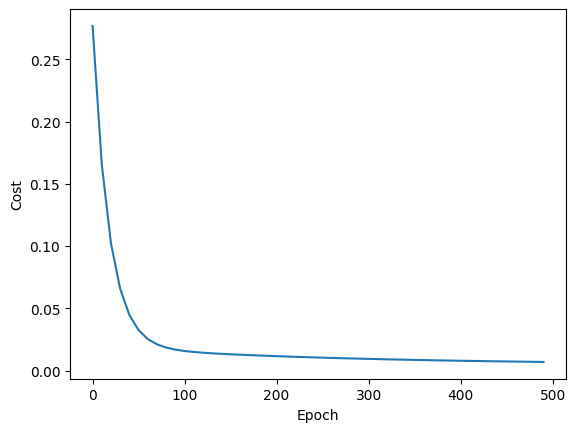

In [16]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list, cost_list)

In [24]:
def predict(area,bedroom,w,b):
  scaled_X = sx.transform([[area,bedroom]])[0]
  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]


predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [25]:
predict(1000,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442363

In [27]:
import random
random.randint(0,6)

6

In [30]:
def stochastic_gradient_descent(X , y_true , epochs , learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape = number_of_features)
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples) * (sample_x * (sample_y - y_predicted))
    b_grad = -(2/total_samples) * (sample_y - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y - y_predicted)

    if i%100==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w , b , cost , cost_list , epoch_list

w_sgd , b_sgd , cost_sgd , cost_list_sgd , epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd , b_sgd , cost_sgd

(array([0.70673477, 0.67603385]), -0.22940347663548852, 0.002170980629128325)

In [31]:
w , b ,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

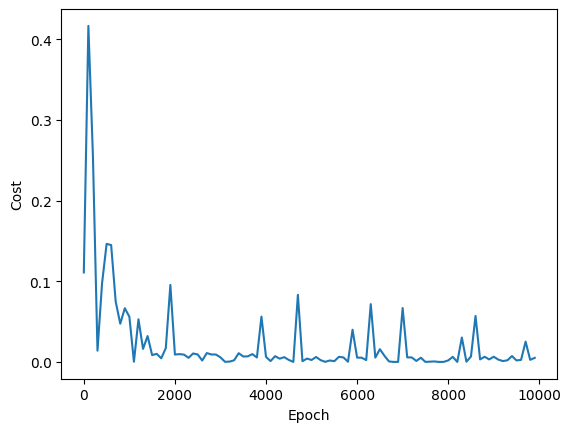

In [32]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [33]:
predict(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.69845835024765